In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
from sklearn import preprocessing

## MINMAX SCALER 

In [134]:
col=['Subject','AWI ba', 'AWI sp1', 'AWI sp2', 'AWI sp3', 'AWI sp4', 'AWI sp5', 'AWI sp6']
df=pd.read_csv('AWI.csv', names=col)
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,8091,-3.062376e-15,2.024494e-16,-9.416454e-16,-2.281085e-13,-2.454843e-16,-2.481206e-15,-1.047826e-15
1,2900,1.395716e-16,-9.143797e-20,-4.260692e-19,3.028034e-17,7.112190e-19,4.090293e-18,-1.930683e-16
2,1702,2.357322e-19,-3.022391e-20,-7.587049e-20,-4.314041e-20,1.241808e-19,2.142278e-20,-2.689550e-20
3,656,-1.261830e-18,3.362488e-19,7.180021e-20,5.693725e-20,3.785849e-19,3.590698e-19,1.026992e-19
4,6401,-9.252760e-18,-2.400573e-16,-2.633969e-16,-1.090815e-16,-1.631661e-16,3.993431e-14,2.240832e-17


In [135]:
cols_to_norm = ['AWI sp1', 'AWI sp2', 'AWI sp3', 'AWI sp4', 'AWI sp5', 'AWI sp6']
df[cols_to_norm] = (preprocessing.MinMaxScaler().fit_transform(df[cols_to_norm].T)).T
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,8091,-3.062376e-15,1.000000,0.994989,0.000000,0.998038,0.988246,0.994524
1,2900,1.395716e-16,0.864016,0.862518,1.000000,0.867610,0.882739,0.000000
2,1702,2.357322e-19,0.228174,0.000000,0.163608,1.000000,0.486342,0.244812
3,656,-1.261830e-18,0.868377,0.046209,0.000000,1.000000,0.939328,0.142273
4,6401,-9.252760e-18,0.000581,0.000000,0.003839,0.002493,1.000000,0.007110


In [122]:
AWI_ba=np.ravel(df.iloc[:,1:2])
AWI_sp1=np.ravel(df.iloc[:,2:3])
AWI_sp2=np.ravel(df.iloc[:,3:4])
AWI_sp3=np.ravel(df.iloc[:,4:5])
AWI_sp4=np.ravel(df.iloc[:,5:6])
AWI_sp5=np.ravel(df.iloc[:,6:7])
AWI_sp6=np.ravel(df.iloc[:,7:])

In [123]:
mean_AWI = [stats.mean(AWI_ba), stats.mean(AWI_sp1), stats.mean(AWI_sp2), stats.mean(AWI_sp3), 
            stats.mean(AWI_sp4), stats.mean(AWI_sp5), stats.mean(AWI_sp6)]

desv_AWI = [np.std(AWI_ba), np.std(AWI_sp1), np.std(AWI_sp2), np.std(AWI_sp3), np.std(AWI_sp4), 
            np.std(AWI_sp5), np.std(AWI_sp6)]

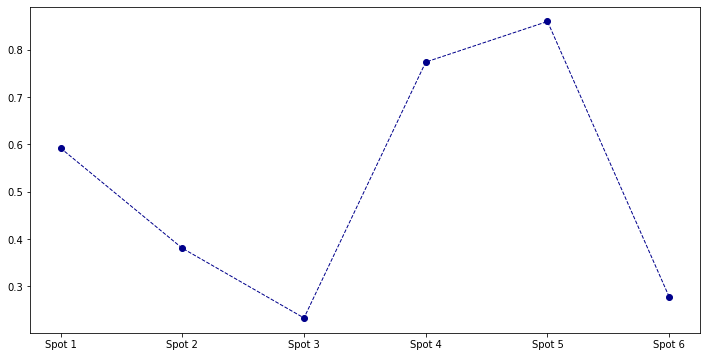

In [127]:
labels = ['Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.figure(figsize=(12,6))
plt.plot(mean_AWI[1:], lw=1,ls='--', c='darkblue', marker='o', ms=6, mfc='darkblue')
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.show()

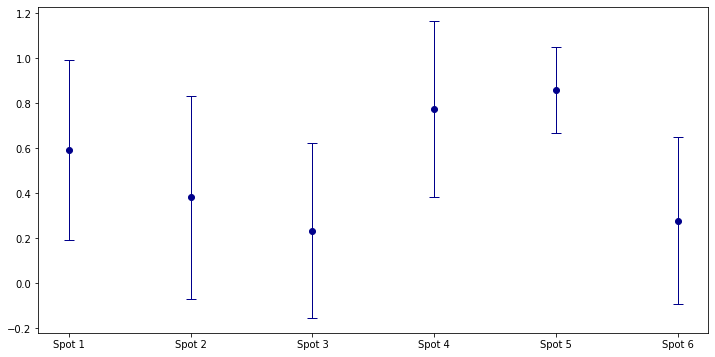

In [116]:
labels = ['Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.figure(figsize=(12,6))
plt.errorbar(np.arange(len(labels)), mean_AWI[1:], desv_AWI[1:], fmt = "o ", capsize= 5, c='darkblue', ms=6,lw=1)
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.show()

## DIVIDIR POR AWI_BA

In [128]:
col=['Subject','AWI ba', 'AWI sp1', 'AWI sp2', 'AWI sp3', 'AWI sp4', 'AWI sp5', 'AWI sp6']
df=pd.read_csv('AWI.csv', names=col)
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,8091,-3.062376e-15,2.024494e-16,-9.416454e-16,-2.281085e-13,-2.454843e-16,-2.481206e-15,-1.047826e-15
1,2900,1.395716e-16,-9.143797e-20,-4.260692e-19,3.028034e-17,7.112190e-19,4.090293e-18,-1.930683e-16
2,1702,2.357322e-19,-3.022391e-20,-7.587049e-20,-4.314041e-20,1.241808e-19,2.142278e-20,-2.689550e-20
3,656,-1.261830e-18,3.362488e-19,7.180021e-20,5.693725e-20,3.785849e-19,3.590698e-19,1.026992e-19
4,6401,-9.252760e-18,-2.400573e-16,-2.633969e-16,-1.090815e-16,-1.631661e-16,3.993431e-14,2.240832e-17


In [129]:
cols_to_norm = ['AWI sp1', 'AWI sp2', 'AWI sp3', 'AWI sp4', 'AWI sp5', 'AWI sp6']
for i in cols_to_norm:
    df[i]=df[i]/abs(df['AWI ba'])
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,8091,-3.062376e-15,0.066109,-0.307488,-74.487436,-0.080161,-0.810222,-0.342161
1,2900,1.395716e-16,-0.000655,-0.003053,0.216952,0.005096,0.029306,-1.383292
2,1702,2.357322e-19,-0.128213,-0.321850,-0.183006,0.526788,0.090878,-0.114093
3,656,-1.261830e-18,0.266477,0.056902,0.045123,0.300028,0.284563,0.081389
4,6401,-9.252760e-18,-25.944396,-28.466845,-11.789076,-17.634318,4315.935521,2.421799


In [130]:
df=df.drop(4) #Drop outlier row

AWI_ba=np.ravel(df.iloc[:,1:2])
AWI_sp1=np.ravel(df.iloc[:,2:3])
AWI_sp2=np.ravel(df.iloc[:,3:4])
AWI_sp3=np.ravel(df.iloc[1:,4:5]) #Drop outlier -74.4874 to obtain mean and std
AWI_sp4=np.ravel(df.iloc[:,5:6])
AWI_sp5=np.ravel(df.iloc[:,6:7])
AWI_sp6=np.ravel(df.iloc[:,7:])

In [131]:
mean_AWI = [stats.mean(AWI_ba), stats.mean(AWI_sp1), stats.mean(AWI_sp2), stats.mean(AWI_sp3), 
            stats.mean(AWI_sp4), stats.mean(AWI_sp5), stats.mean(AWI_sp6)]

desv_AWI = [np.std(AWI_ba), np.std(AWI_sp1), np.std(AWI_sp2), np.std(AWI_sp3), np.std(AWI_sp4), 
            np.std(AWI_sp5), np.std(AWI_sp6)]

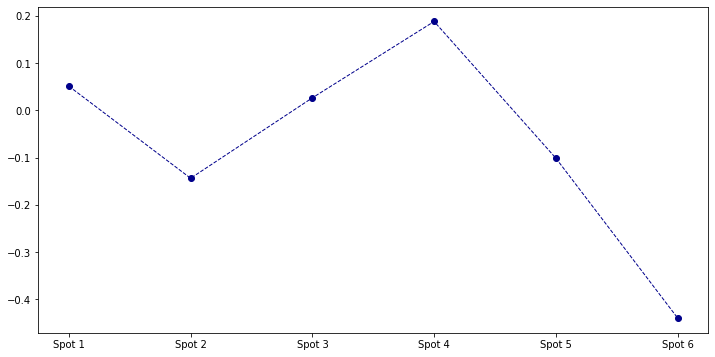

In [132]:
labels = ['Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.figure(figsize=(12,6))
plt.plot(mean_AWI[1:], lw=1,ls='--', c='darkblue', marker='o', ms=6, mfc='darkblue')
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.show()

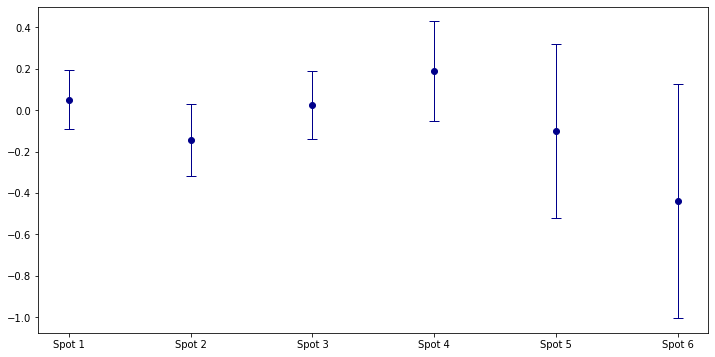

In [133]:
labels = ['Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.figure(figsize=(12,6))
plt.errorbar(np.arange(len(labels)), mean_AWI[1:], desv_AWI[1:], fmt = "o ", capsize= 5, c='darkblue', ms=6,lw=1)
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.show()

## SIN NORMALIZAR

In [101]:
col=['Subject','AWI ba', 'AWI sp1', 'AWI sp2', 'AWI sp3', 'AWI sp4', 'AWI sp5', 'AWI sp6']
df=pd.read_csv('AWI.csv', names=col)
df

,Subject,AWI ba,AWI sp1,AWI sp2,AWI sp3,AWI sp4,AWI sp5,AWI sp6
0,8091,-3.062376e-15,2.024494e-16,-9.416454e-16,-2.281085e-13,-2.454843e-16,-2.481206e-15,-1.047826e-15
1,2900,1.395716e-16,-9.143797e-20,-4.260692e-19,3.028034e-17,7.112190e-19,4.090293e-18,-1.930683e-16
2,1702,2.357322e-19,-3.022391e-20,-7.587049e-20,-4.314041e-20,1.241808e-19,2.142278e-20,-2.689550e-20
3,656,-1.261830e-18,3.362488e-19,7.180021e-20,5.693725e-20,3.785849e-19,3.590698e-19,1.026992e-19
4,6401,-9.252760e-18,-2.400573e-16,-2.633969e-16,-1.090815e-16,-1.631661e-16,3.993431e-14,2.240832e-17


In [102]:
#df=df.drop(4)

AWI_ba=np.ravel(df.iloc[:,1:2])
AWI_sp1=np.ravel(df.iloc[:,2:3])
AWI_sp2=np.ravel(df.iloc[:,3:4])
#AWI_sp3=np.ravel(df.iloc[1:,4:5])
AWI_sp3=np.ravel(df.iloc[:,4:5])
AWI_sp4=np.ravel(df.iloc[:,5:6])
AWI_sp5=np.ravel(df.iloc[:,6:7])
#AWI_sp5=np.ravel(df.iloc[0:4,6:7])
AWI_sp6=np.ravel(df.iloc[:,7:])

In [103]:
mean_AWI = [stats.mean(AWI_ba), stats.mean(AWI_sp1), stats.mean(AWI_sp2), stats.mean(AWI_sp3), 
            stats.mean(AWI_sp4), stats.mean(AWI_sp5), stats.mean(AWI_sp6)]

desv_AWI = [np.std(AWI_ba), np.std(AWI_sp1), np.std(AWI_sp2), np.std(AWI_sp3), np.std(AWI_sp4), 
            np.std(AWI_sp5), np.std(AWI_sp6)]

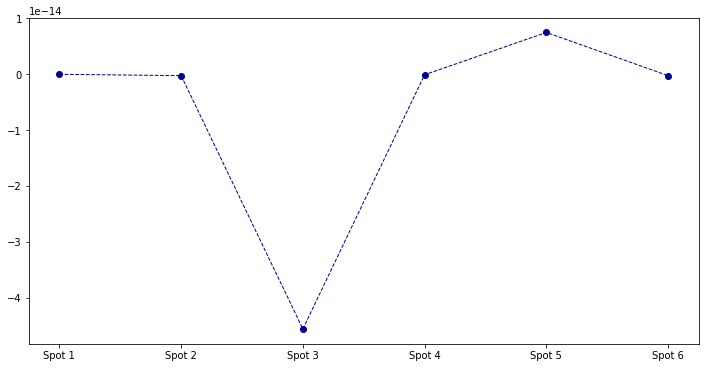

In [104]:
labels = ['Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.figure(figsize=(12,6))
plt.plot(mean_AWI[1:], lw=1,ls='--', c='darkblue', marker='o', ms=6, mfc='darkblue')
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.show()

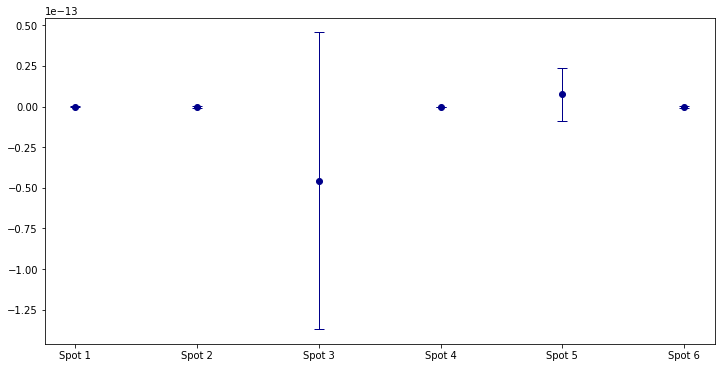

In [105]:
labels = ['Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'Spot 5', 'Spot 6']
plt.figure(figsize=(12,6))
plt.errorbar(np.arange(len(labels)), mean_AWI[1:], desv_AWI[1:], fmt = "o ", capsize= 5, c='darkblue', ms=6,lw=1)
plt.xticks(ticks=np.arange(len(labels)),labels=labels)
plt.show()